# Insurance Churn Prediction

Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a different insurance provider.

For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behavior to prevent retention. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

# Task

Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.

You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry.

*Build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.*

# 1. Read and import all data files

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/Test.csv
/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/sample_submission.xlsx
/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/Train.csv


<Figure size 432x288 with 0 Axes>

In [2]:
#read data
train = pd.read_csv("/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/Train.csv")
test = pd.read_csv("/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/Test.csv")

In [3]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [4]:
test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


# 2. Features Analysis:

In [5]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


### 2.1 **Check Categorical features**

In [6]:
train.dtypes

feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7       int64
feature_8       int64
feature_9       int64
feature_10      int64
feature_11      int64
feature_12      int64
feature_13      int64
feature_14      int64
feature_15      int64
labels          int64
dtype: object

As it is clearly seen there is no categorical feature so there is no need of categorical mapping

### 2.2 **Check missing values**

In [7]:
train.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

There is no missing value.

### 2.3 Univirate Analysis

This analysis helps us in removing the outliers present in the dataset that may lead to overfit the model with noise.

plot of feature feature_0 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a810c2f90>, <matplotlib.lines.Line2D object at 0x7f5a80c84790>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a810df650>, <matplotlib.lines.Line2D object at 0x7f5a810dfb50>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a810c2f50>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a810dfbd0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a810e65d0>], 'means': []}


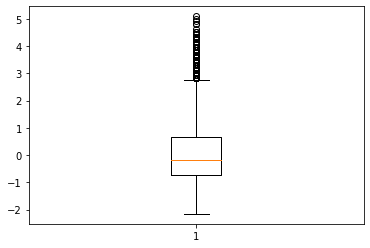

plot of feature feature_1 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a81056210>, <matplotlib.lines.Line2D object at 0x7f5a810ae850>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80fea510>, <matplotlib.lines.Line2D object at 0x7f5a80feaa10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a810633d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80ff1510>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80ff1450>], 'means': []}


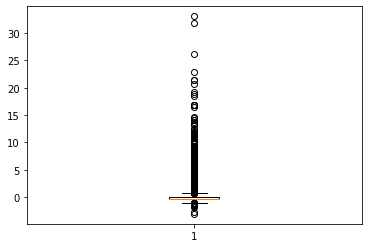

plot of feature feature_2 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80fcefd0>, <matplotlib.lines.Line2D object at 0x7f5a80fdcbd0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80fe2110>, <matplotlib.lines.Line2D object at 0x7f5a80fe2610>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80fcef90>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a8101e210>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80fe9050>], 'means': []}


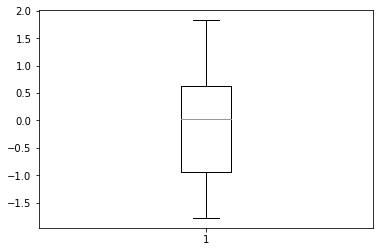

plot of feature feature_3 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80f461d0>, <matplotlib.lines.Line2D object at 0x7f5a80f52e90>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80f56350>, <matplotlib.lines.Line2D object at 0x7f5a80f56850>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80f52250>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80f94590>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80f5e290>], 'means': []}


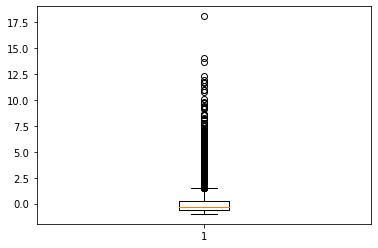

plot of feature feature_4 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80eb6f90>, <matplotlib.lines.Line2D object at 0x7f5a80ec3b90>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80ec80d0>, <matplotlib.lines.Line2D object at 0x7f5a80ec85d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80eb6f50>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80f0db50>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80ed1050>], 'means': []}


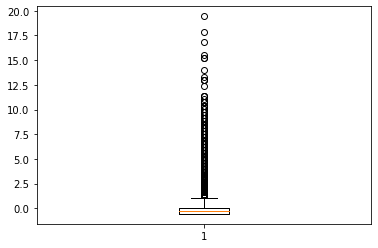

plot of feature feature_5 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80ea82d0>, <matplotlib.lines.Line2D object at 0x7f5a80e73a90>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80e3a510>, <matplotlib.lines.Line2D object at 0x7f5a80e3aa10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80e343d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80e44510>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80e44450>], 'means': []}


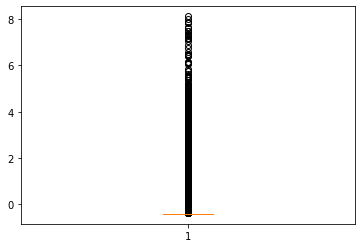

plot of feature feature_6 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80e13f50>, <matplotlib.lines.Line2D object at 0x7f5a80e21b50>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80e26050>, <matplotlib.lines.Line2D object at 0x7f5a80e26550>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80e13f10>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80dee2d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80e26b50>], 'means': []}


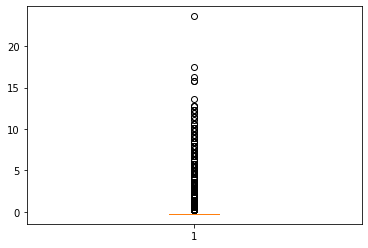

plot of feature feature_7 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80d7ead0>, <matplotlib.lines.Line2D object at 0x7f5a80d886d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80d88bd0>, <matplotlib.lines.Line2D object at 0x7f5a80d8f110>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80d7ea90>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80d8fbd0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80d8fc50>], 'means': []}


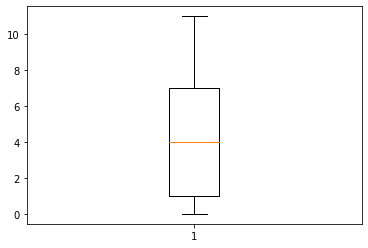

plot of feature feature_8 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80db8f10>, <matplotlib.lines.Line2D object at 0x7f5a80e13550>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80e13fd0>, <matplotlib.lines.Line2D object at 0x7f5a80e21ed0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80db8f90>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80d3b550>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80e219d0>], 'means': []}


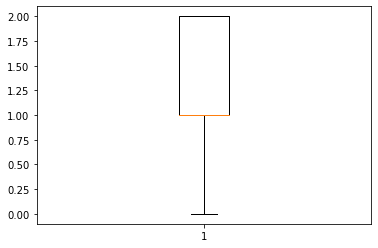

plot of feature feature_9 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80f0d890>, <matplotlib.lines.Line2D object at 0x7f5a80eefd50>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80f67450>, <matplotlib.lines.Line2D object at 0x7f5a80f67950>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80eefc10>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80e44c50>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80ef5110>], 'means': []}


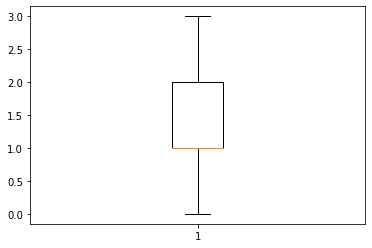

plot of feature feature_10 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a81079c90>, <matplotlib.lines.Line2D object at 0x7f5a810e65d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a810e6450>, <matplotlib.lines.Line2D object at 0x7f5a810f2a50>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a81079d90>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a810f2b90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a810f2dd0>], 'means': []}


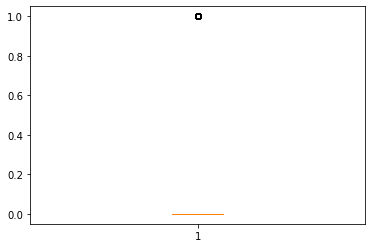

plot of feature feature_11 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80e49390>, <matplotlib.lines.Line2D object at 0x7f5a8100c090>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a8100c510>, <matplotlib.lines.Line2D object at 0x7f5a8100ca10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a81022450>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a8101f510>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a8101f450>], 'means': []}


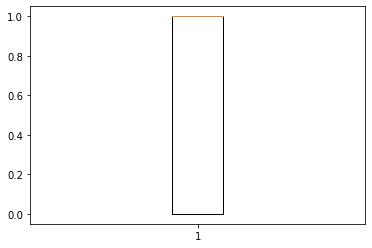

plot of feature feature_12 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80f1f5d0>, <matplotlib.lines.Line2D object at 0x7f5a80ef01d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80ef06d0>, <matplotlib.lines.Line2D object at 0x7f5a80ef0bd0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80f1f590>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80f296d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80f29610>], 'means': []}


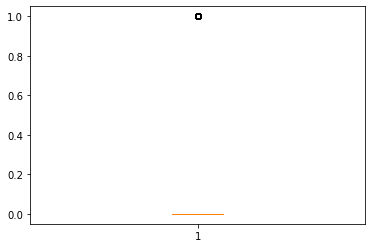

plot of feature feature_13 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80eb5850>, <matplotlib.lines.Line2D object at 0x7f5a80ec5450>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80ec5950>, <matplotlib.lines.Line2D object at 0x7f5a80ec5e50>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80eb5810>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80e91950>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80e91890>], 'means': []}


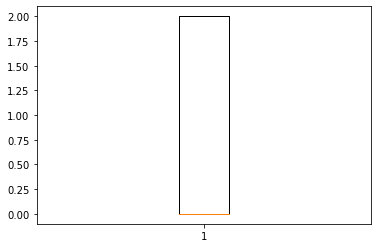

plot of feature feature_14 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80f34c10>, <matplotlib.lines.Line2D object at 0x7f5a80f3b810>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80f3bd10>, <matplotlib.lines.Line2D object at 0x7f5a80f58250>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80f34bd0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80f58d10>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80f58c50>], 'means': []}


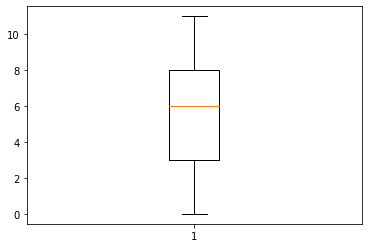

plot of feature feature_15 is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80fded90>, <matplotlib.lines.Line2D object at 0x7f5a80cf3990>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80cf3e10>, <matplotlib.lines.Line2D object at 0x7f5a80cf9350>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80fded50>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80cf9e10>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80cf9d50>], 'means': []}


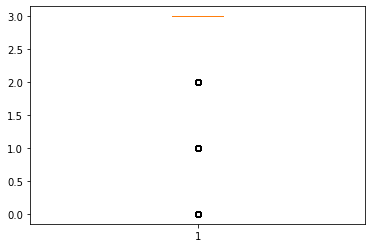

plot of feature labels is {'whiskers': [<matplotlib.lines.Line2D object at 0x7f5a80cda650>, <matplotlib.lines.Line2D object at 0x7f5a80ce2290>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5a80ce2710>, <matplotlib.lines.Line2D object at 0x7f5a80ce2c10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5a80cda550>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5a80c0f710>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5a80c0f650>], 'means': []}


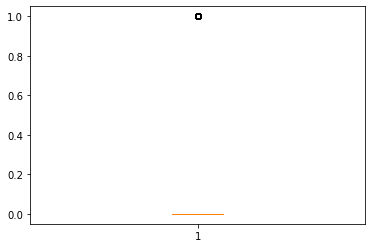

In [8]:
for col in train.columns:
    plot = plt.boxplot(train[col])
    print(f'plot of feature {col} is {plot}')
    plt.show()

With the help of plots, lets check the index of main outliers so we can delete them.

In [9]:
train[train['feature_1']>24].index

Int64Index([5445, 5606, 29608], dtype='int64')

In [10]:
train[train['feature_3']>15].index

Int64Index([7705], dtype='int64')

In [11]:
train[train['feature_4']>16].index

Int64Index([17893, 20894, 32159], dtype='int64')

In [12]:
train[train['feature_6']>20].index

Int64Index([20042], dtype='int64')

Now let us drop these outliers from dataset.

In [13]:
train1 = train.drop([5445, 5606, 29608, 20042, 17893, 20894, 32159, 7705])

### 2.4 Bi-variate Analysis
Check which feature is relevant or not.

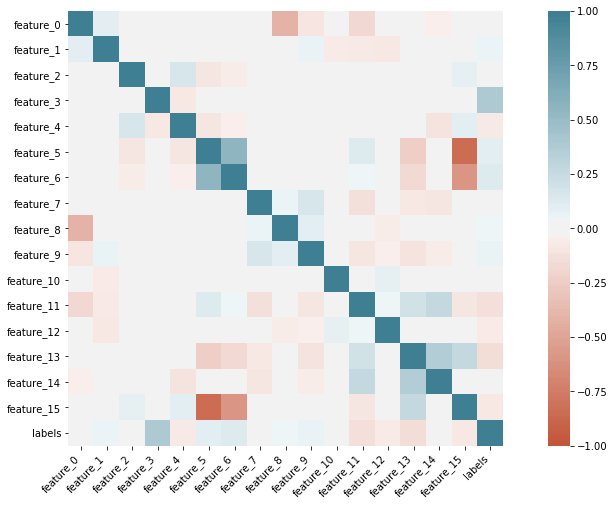

In [14]:
plt.figure(figsize=(16,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 3. Split the features and lables from data

In [15]:
X = train[[col for col in train.columns if not col == 'labels']]
X = X.set_index('feature_0')
X.shape

(33908, 15)

In [16]:
y = train['labels']
y.shape

(33908,)

# 4. Splitting the dataset into the Training set and Test set

We divide the data here into 80% train set and 20% test set.

In [17]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state = 0)

# 5. Create Model

Here I'm using XGBOOST for classification.

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

### 4.1 Import model

Here the tuning of parameters is alraedy done by me.

In [18]:
from xgboost import XGBClassifier
model_xgb  = XGBClassifier(n_estimators = 178,
                       eta = 0.17,
                       booster_pram = 'dart',
                       tree_method = 'hist',
                       scale_pos_weight= 5,
                       max_bin=215,
                       random_state = 0)

### 4.2 Fit the model

In [19]:
model_xgb.fit(train_X,
          train_y)

XGBClassifier(base_score=0.5, booster=None, booster_pram='dart',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              eta=0.17, gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.170000002,
              max_bin=215, max_delta_step=0, max_depth=6, min_child_weight=1,
              missing=nan, monotone_constraints=None, n_estimators=178,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=1, tree_method='hist', validate_parameters=False,
              verbosity=None)

### 4.3 Make the Prediction on test data

In [20]:
predict = model_xgb.predict(val_X)

### 4.4 Evaluate these predictions using F1 score metric

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [21]:
from sklearn.metrics import f1_score
f1_score(val_y,predict)

0.6374298827129016

0.63 is pretty good score on this dataset. It is improved by doing some feature engineering, etc. 
You can try different algorithms too.

### 4.5  Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.


In [22]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix \n",confusion_matrix(val_y,predict))

Confusion matrix 
 [[5446  554]
 [ 157  625]]


Keep supporting!


## Any advice would be appreciated.